<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  25.6M      0 --:--:-- --:--:-- --:--:-- 25.6M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

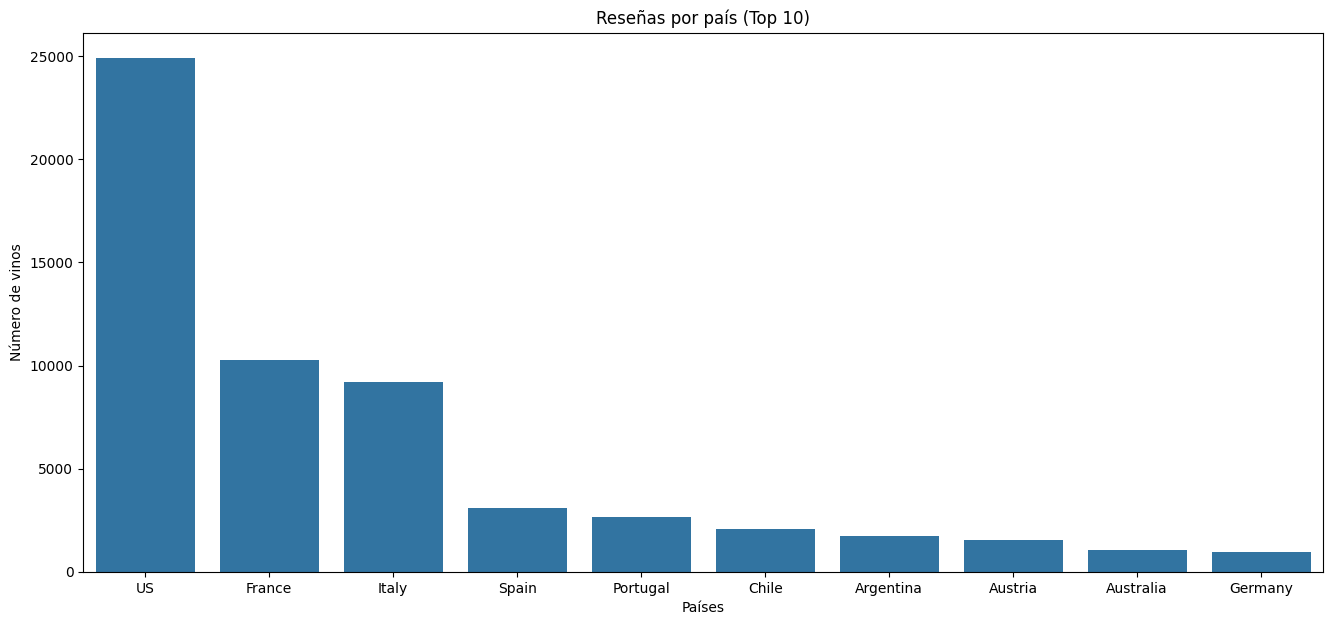

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ubicar el nombre de la columna de país
# Supongamos que la columna se llama "country"

# 2. Sobre esta columna, obtener la Serie correspondiente
serie_paises = df['country']

# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos = serie_paises.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(16, 7))
sns.barplot(x=x[:10], y=y[:10])

# Agregar título y etiquetas de los ejes
plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

# Mostrar el gráfico
plt.show()


### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

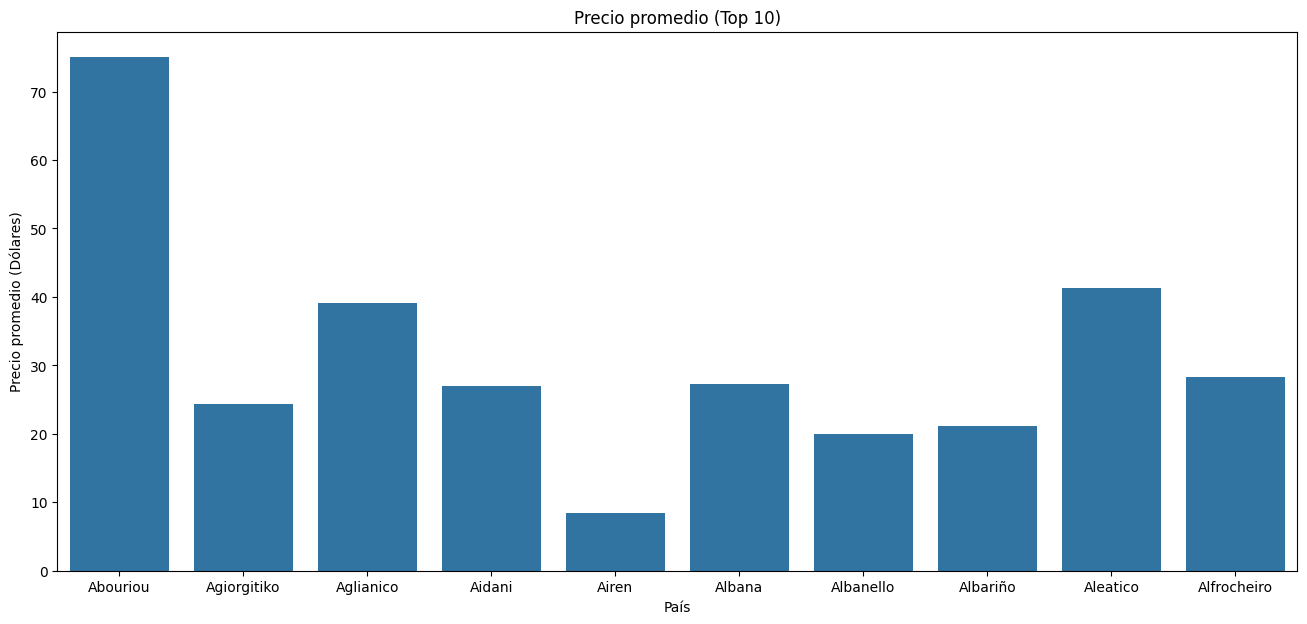

In [ ]:
"""
SECUENCIA:

"""
promedios = df.groupby('variety').mean('price')
x = promedios.index
y = promedios.price

#print(x.shape)

plt.figure(figsize=(16,7))

sns.barplot(x=x[:10], y=y[:10])

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()



#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

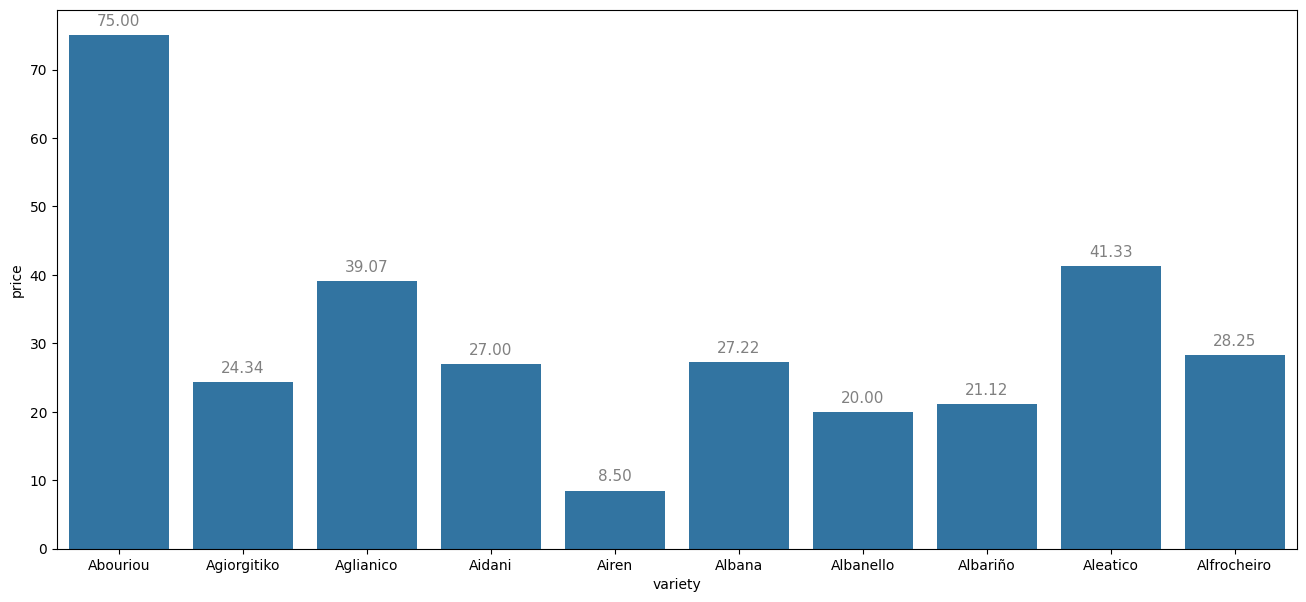

In [ ]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

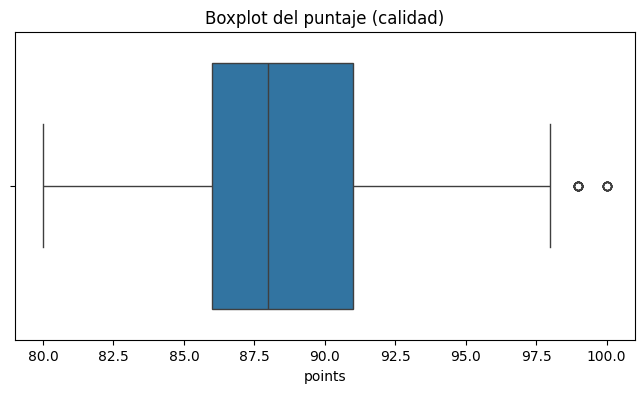

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

<ipython-input-50-a15c5d66464d>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedios = df.groupby('variety').mean()


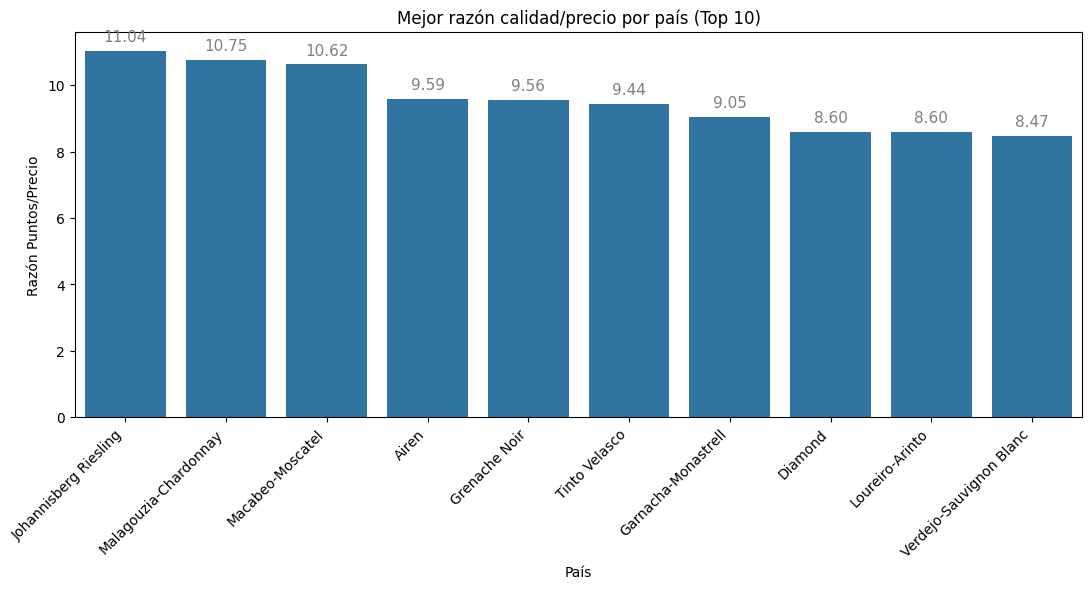

In [ ]:
"""
SECUENCIA:

"""
plt.figure(figsize=(13,5))

### TU CODIGO AQUI ##
promedios = df.groupby('variety').mean()
promedios['quality/price'] = promedios['points']/promedios['price']
promedios = promedios.sort_values('quality/price', ascending=False).reset_index()
x = promedios['variety']
y = promedios['quality/price']
ax = sns.barplot(x = x[:10], y = y[:10])

#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

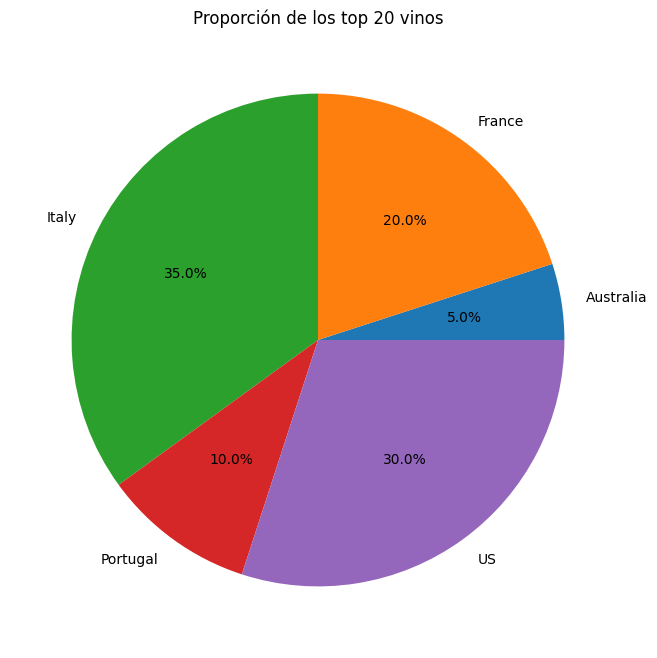

In [ ]:
#TU CODIGO
best_wines = df.sort_values('points', ascending=False)[:20]
per_country = best_wines.groupby('country').size().reset_index(name='count')

labels = per_country['country']
sizes = per_country['count']

plt.figure(figsize=(8, 8))
plt.title("Proporción de los top 20 vinos")

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()



### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
variedades = df.groupby('variety').size().reset_index(name='count').sort_values('count', ascending=False)[:10].reset_index()
variedades['proportion (%)'] = variedades['count']*100 / variedades['count'].sum()
variedades

,index,variety,count,proportion (%)
0,360,Pinot Noir,6096,18.592735
1,100,Chardonnay,5343,16.296093
2,63,Cabernet Sauvignon,4353,13.276604
3,390,Red Blend,4179,12.745905
4,48,Bordeaux-style Red Blend,3164,9.650166
5,396,Riesling,2406,7.338274
6,424,Sauvignon Blanc,2344,7.149175
7,460,Syrah,1900,5.794980
8,406,Rosé,1590,4.849483
9,270,Merlot,1412,4.306585


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
bodegas = df.groupby('winery').size().reset_index(name='count').sort_values('count', ascending=False)[:20]
bodegas['proportion (%)'] = bodegas['count']*100 / bodegas['count'].sum()
bodegas

,winery,count,proportion (%)
6093,Georges Duboeuf,109,7.496561
12931,Wines & Winemakers,107,7.359010
11784,Testarossa,97,6.671252
7960,Louis Latour,87,5.983494
12890,Williams Selyem,86,5.914718
4193,DFJ Vinhos,86,5.914718
2283,Chateau Ste. Michelle,86,5.914718
3906,Concha y Toro,78,5.364512
6058,Gary Farrell,74,5.089409
8056,Lynmar,72,4.951857


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
#TU CODIGO

p_v = df[['country', 'variety' , 'winery' , 'points', 'price']]  #nuevo dataFrame que vamos a construir y luego observar

varieties_list = list(variedades['variety'])
bodegas_list = list(bodegas['winery'])

holder = p_v[p_v['variety'].isin(varieties_list)]
holder = holder[holder['winery'].isin(bodegas_list)]

p_v = holder.reset_index()
p_v['points/price'] = p_v['points'] /p_v['price']
p_v['winery'] = p_v['winery'] + " (" +p_v['country'] + ")"
p_v = p_v.sort_values(['country', 'variety' , 'winery']).reset_index()
p_v = p_v.drop(['level_0', 'index'], axis=1)
p_v

,country,variety,winery,points,price,points/price
0,Argentina,Cabernet Sauvignon,Trapiche (Argentina),84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Trapiche (Argentina),90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Trapiche (Argentina),91,30.0,3.033333
...,...,...,...,...,...,...
994,US,Syrah,Testarossa (US),85,49.0,1.734694
995,US,Syrah,Testarossa (US),91,54.0,1.685185
996,US,Syrah,Testarossa (US),94,54.0,1.740741
997,US,Syrah,Testarossa (US),94,54.0,1.740741


#### &#9758; Observa la relación puntos-precio por país

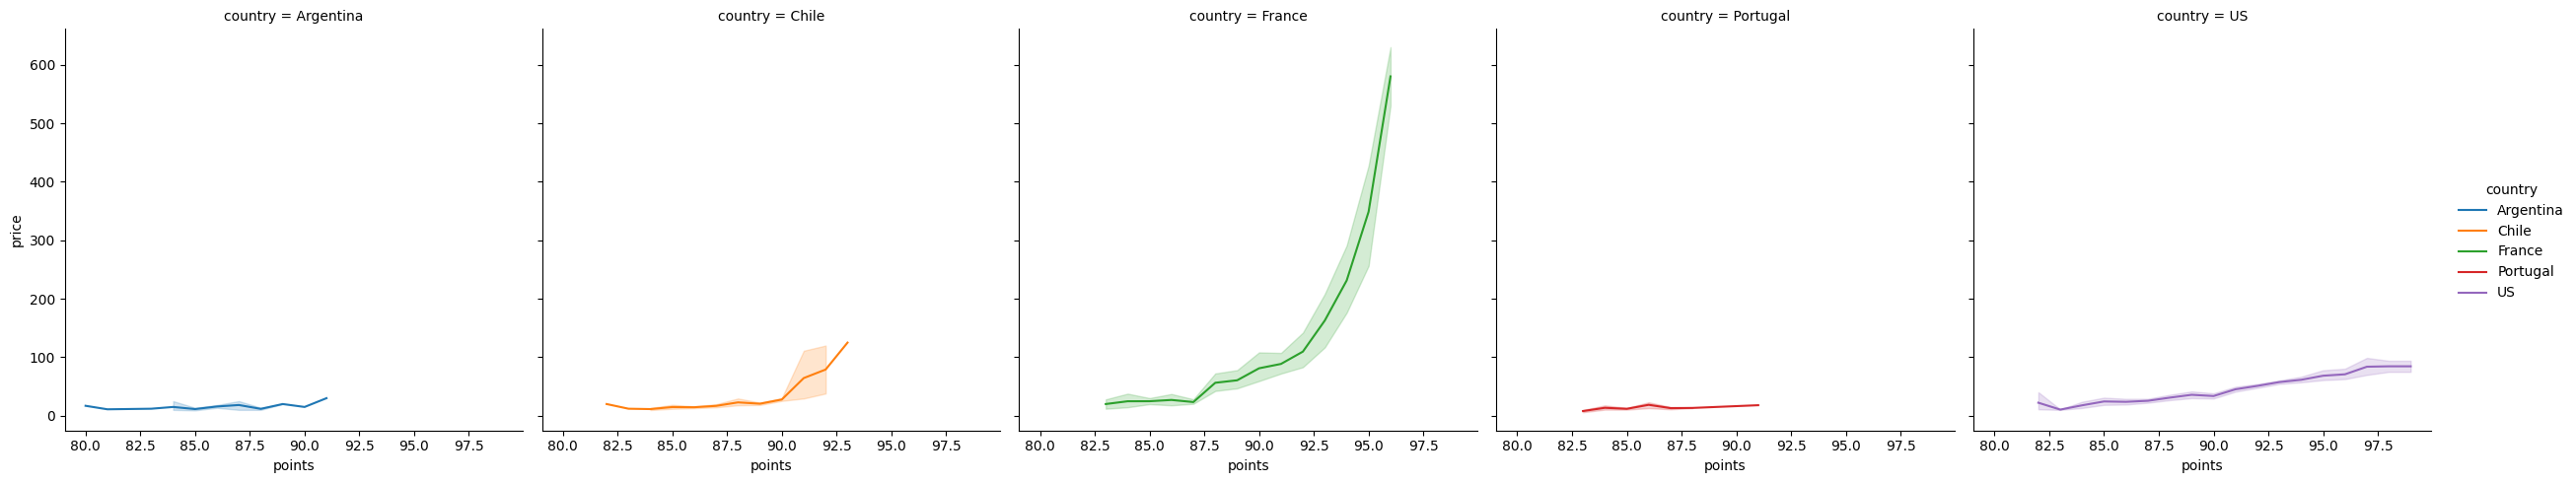

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

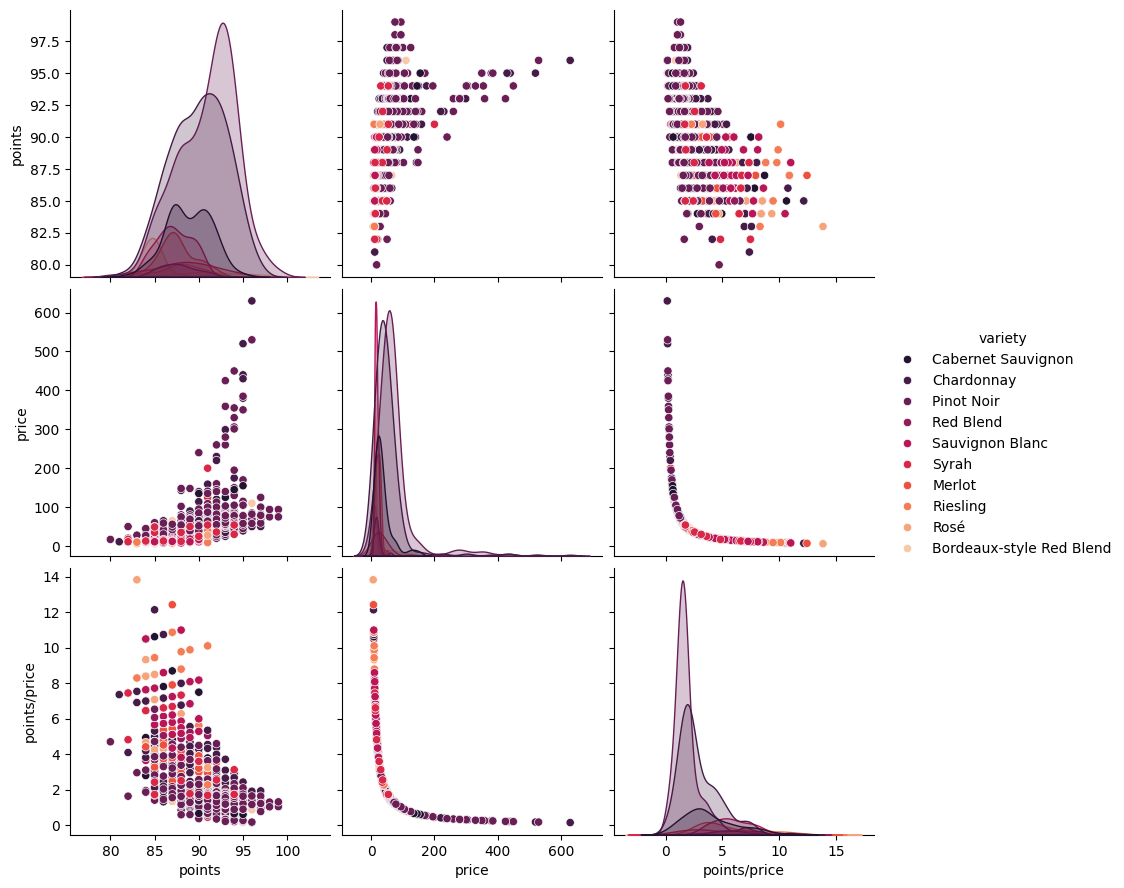

In [ ]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

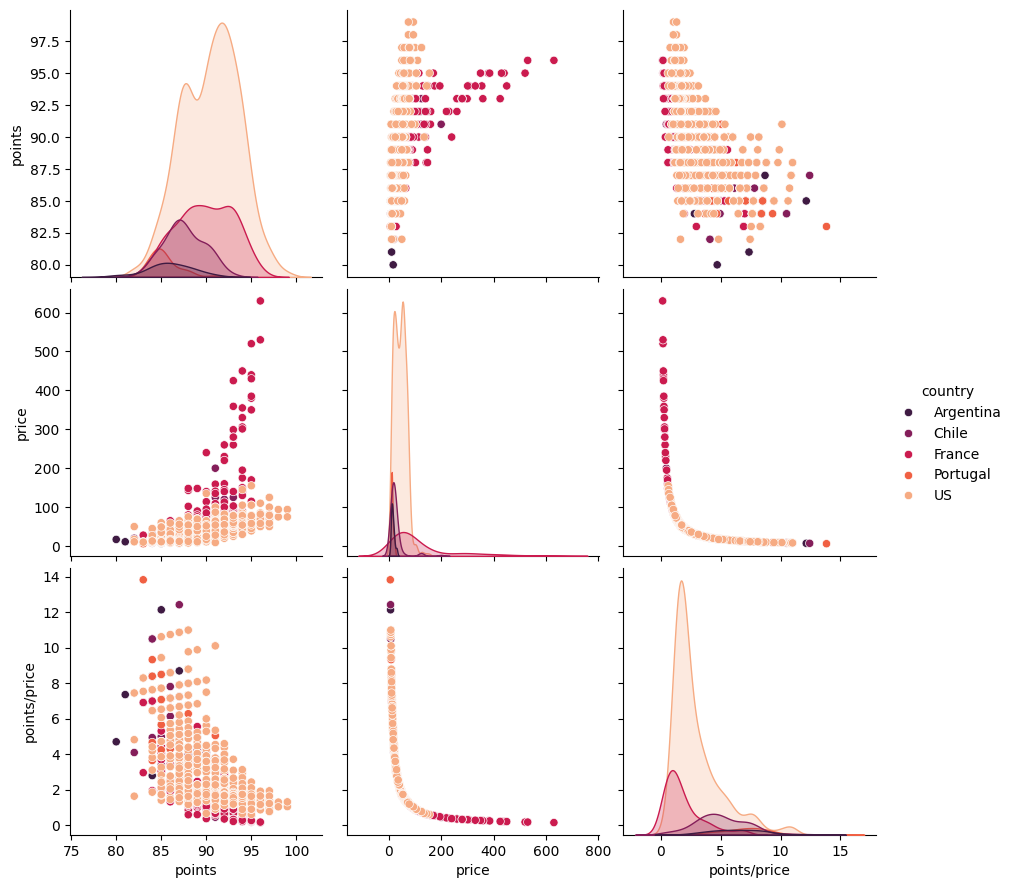

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue="country",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función de la bodega.

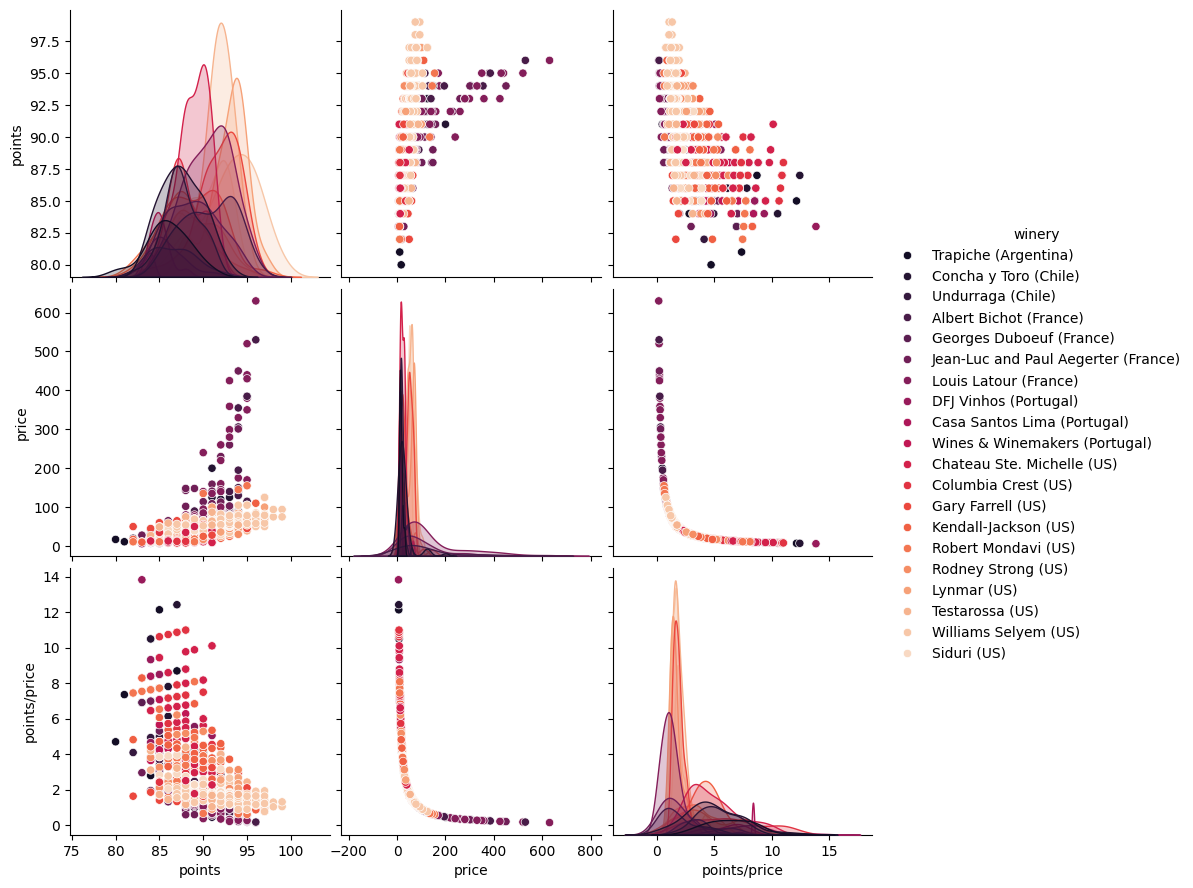

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue="winery",height=3,palette='rocket')

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

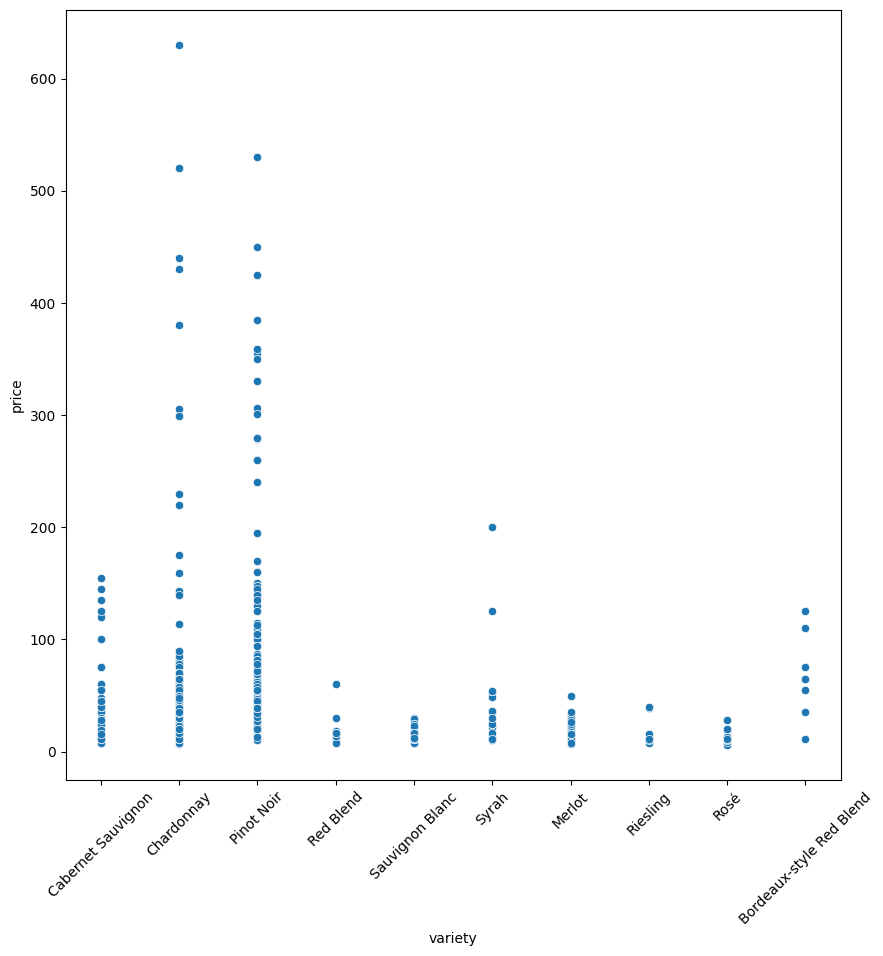

In [ ]:
#TU CODIGO
plt.figure(figsize=(10, 10))
sns.scatterplot(x='variety', y='price', data=p_v)
plt.xticks(rotation=45)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

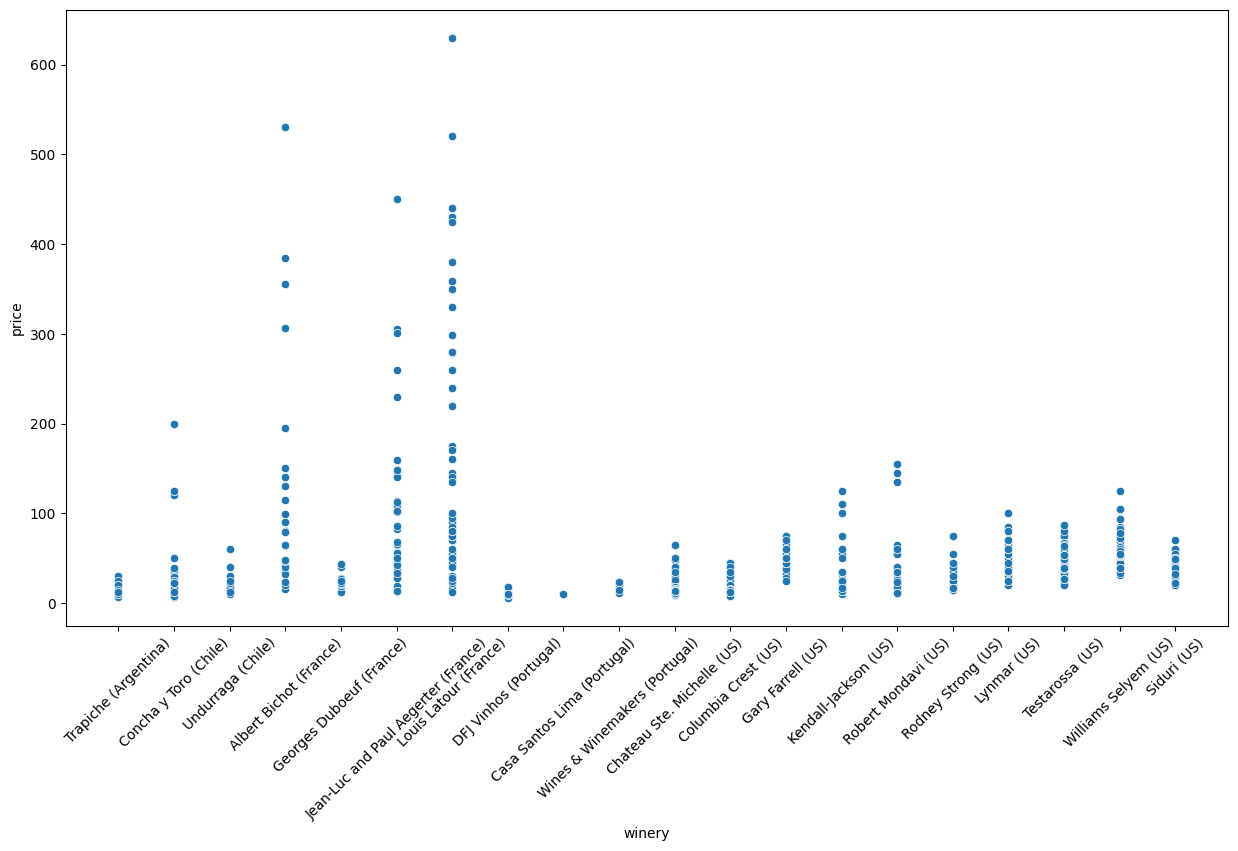

In [ ]:
#TU CODIGO
#TU CODIGO
plt.figure(figsize=(15, 8))
sns.scatterplot(x='winery', y='price', data=p_v)
plt.xticks(rotation=45)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

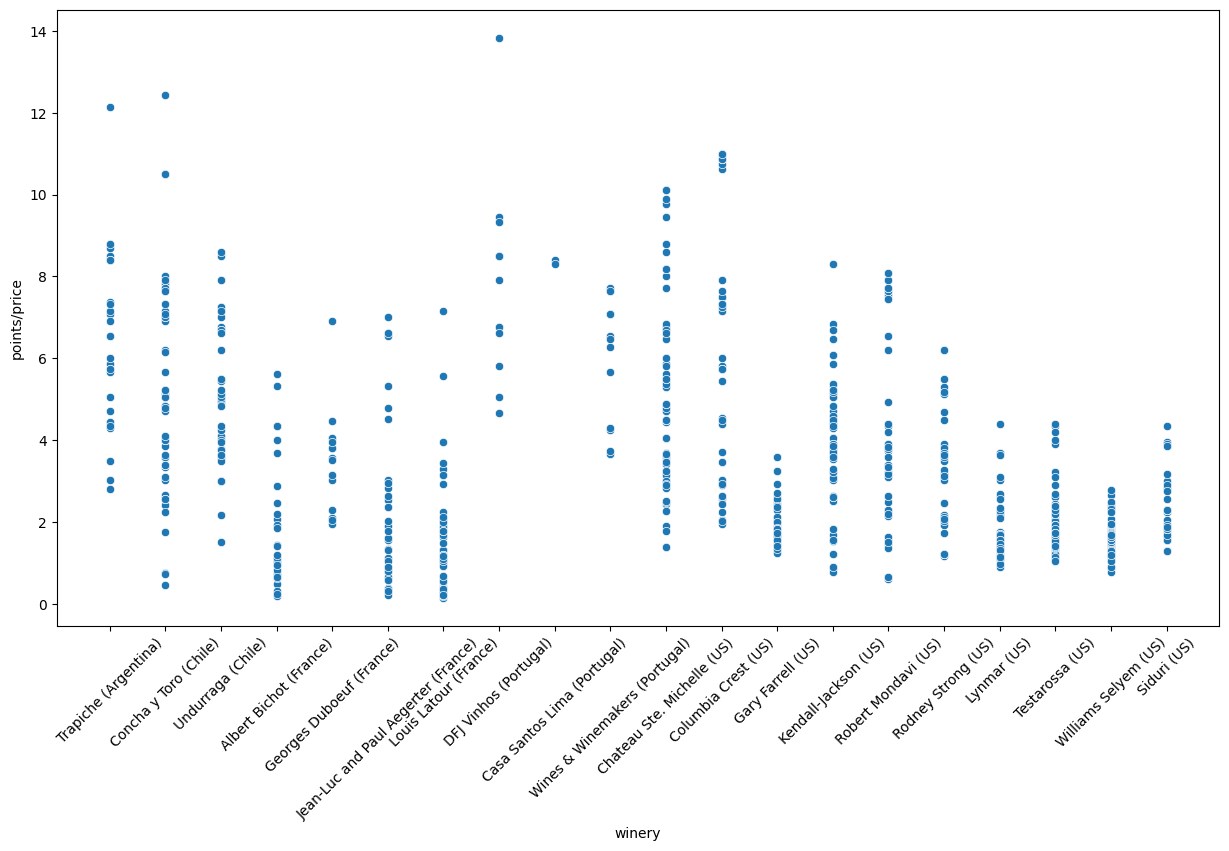

In [ ]:
#TU CODIGO
plt.figure(figsize=(15, 8))
sns.scatterplot(x='winery', y='points/price', data=p_v)
plt.xticks(rotation=45)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

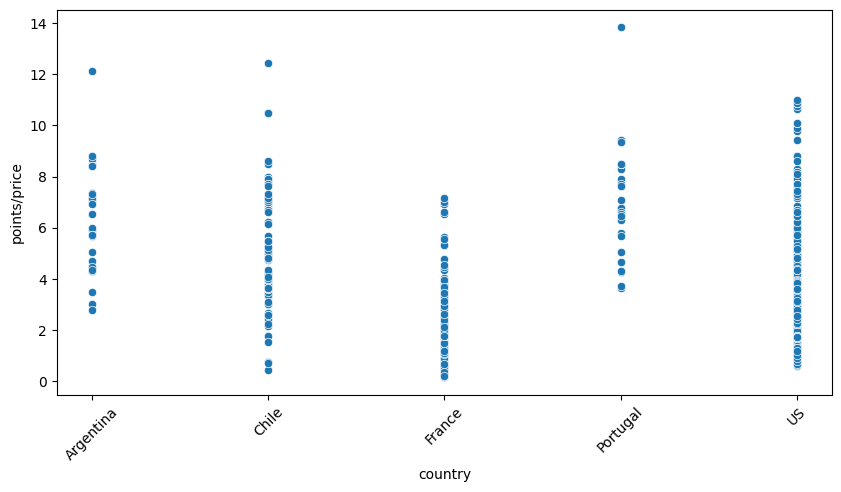

In [ ]:
#TU CODIGO
plt.figure(figsize=(10, 5))
sns.scatterplot(x='country', y='points/price', data=p_v)
plt.xticks(rotation=45)
plt.show()

### __Agrega los datos de México a esta última tabla de información__

---



#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [ ]:
p_v


,country,variety,winery,points,price,points/price
0,Argentina,Cabernet Sauvignon,Trapiche (Argentina),84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Trapiche (Argentina),90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Trapiche (Argentina),91,30.0,3.033333
...,...,...,...,...,...,...
994,US,Syrah,Testarossa (US),85,49.0,1.734694
995,US,Syrah,Testarossa (US),91,54.0,1.685185
996,US,Syrah,Testarossa (US),94,54.0,1.740741
997,US,Syrah,Testarossa (US),94,54.0,1.740741


In [ ]:
nedded_col = list(p_v.columns)
nedded_col

['country', 'variety', 'winery', 'points', 'price', 'points/price']

In [ ]:
holder_MX = vinosMX[nedded_col[:-1]]

In [ ]:
#TU CODIGO
df3 = p_v.append(holder_MX, ignore_index=True)

<ipython-input-66-789684cf7475>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = p_v.append(holder_MX, ignore_index=True)


In [ ]:
df3

,country,variety,winery,points,price,points/price
0,Argentina,Cabernet Sauvignon,Trapiche (Argentina),84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Trapiche (Argentina),90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Trapiche (Argentina),91,30.0,3.033333
...,...,...,...,...,...,...
1024,Mexico,Red Blend,Viñas de Garza,92,54.0,NaN
1025,Mexico,Chardonnay,L.A. Cetto,84,10.0,NaN
1026,Mexico,Sauvignon Blanc-Chenin Blanc,Hacienda La Lomita,86,22.0,NaN
1027,Mexico,Bordeaux-style Red Blend,La Lomita,88,40.0,NaN


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [ ]:
# TU CODIGO
mexico_indices = df3[df3['country'] == 'Mexico'].index
df3.loc[mexico_indices, 'points/price'] = df3.loc[mexico_indices, 'points'] / df3.loc[mexico_indices, 'price']

In [ ]:
df3

,country,variety,winery,points,price,points/price
0,Argentina,Cabernet Sauvignon,Trapiche (Argentina),84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Trapiche (Argentina),90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Trapiche (Argentina),91,30.0,3.033333
...,...,...,...,...,...,...
1024,Mexico,Red Blend,Viñas de Garza,92,54.0,1.703704
1025,Mexico,Chardonnay,L.A. Cetto,84,10.0,8.400000
1026,Mexico,Sauvignon Blanc-Chenin Blanc,Hacienda La Lomita,86,22.0,3.909091
1027,Mexico,Bordeaux-style Red Blend,La Lomita,88,40.0,2.200000


#### &#9758; Observa la relación puntos-precio por país

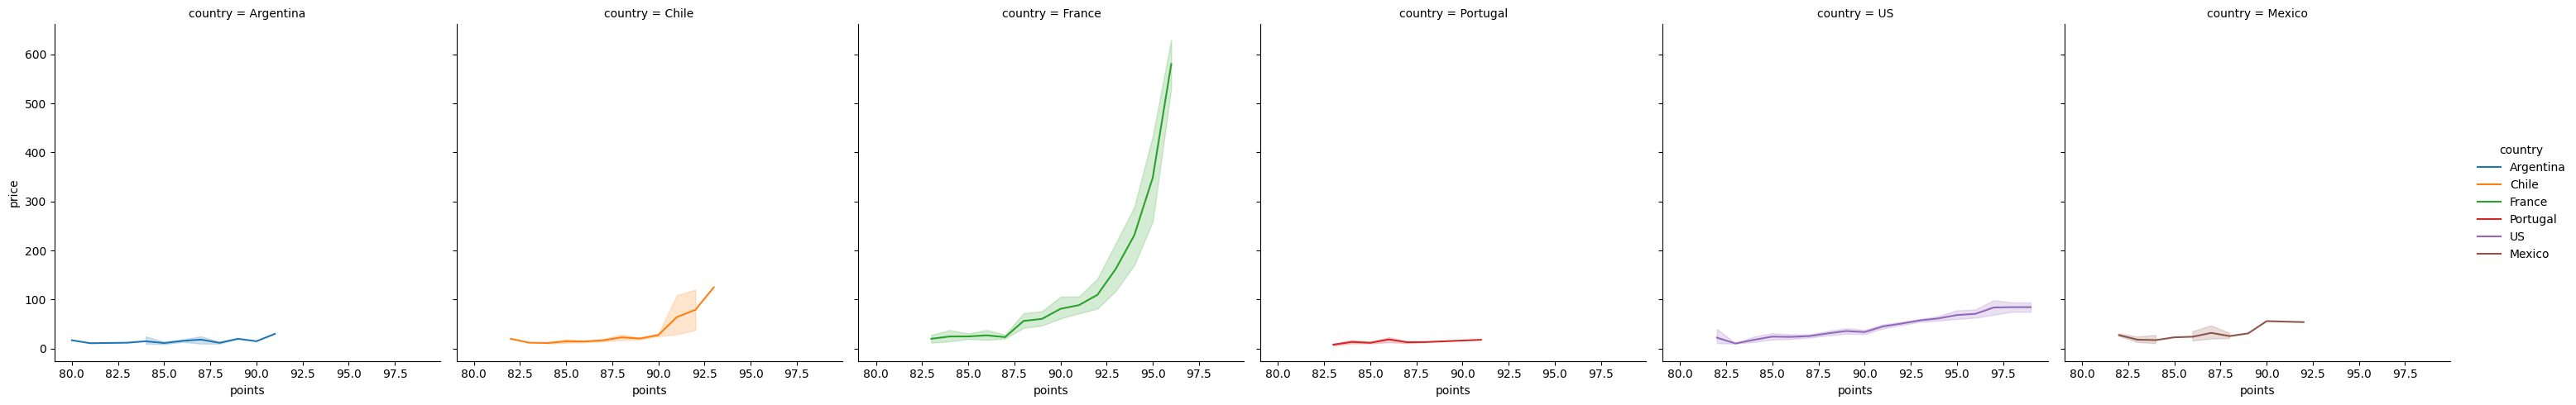

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

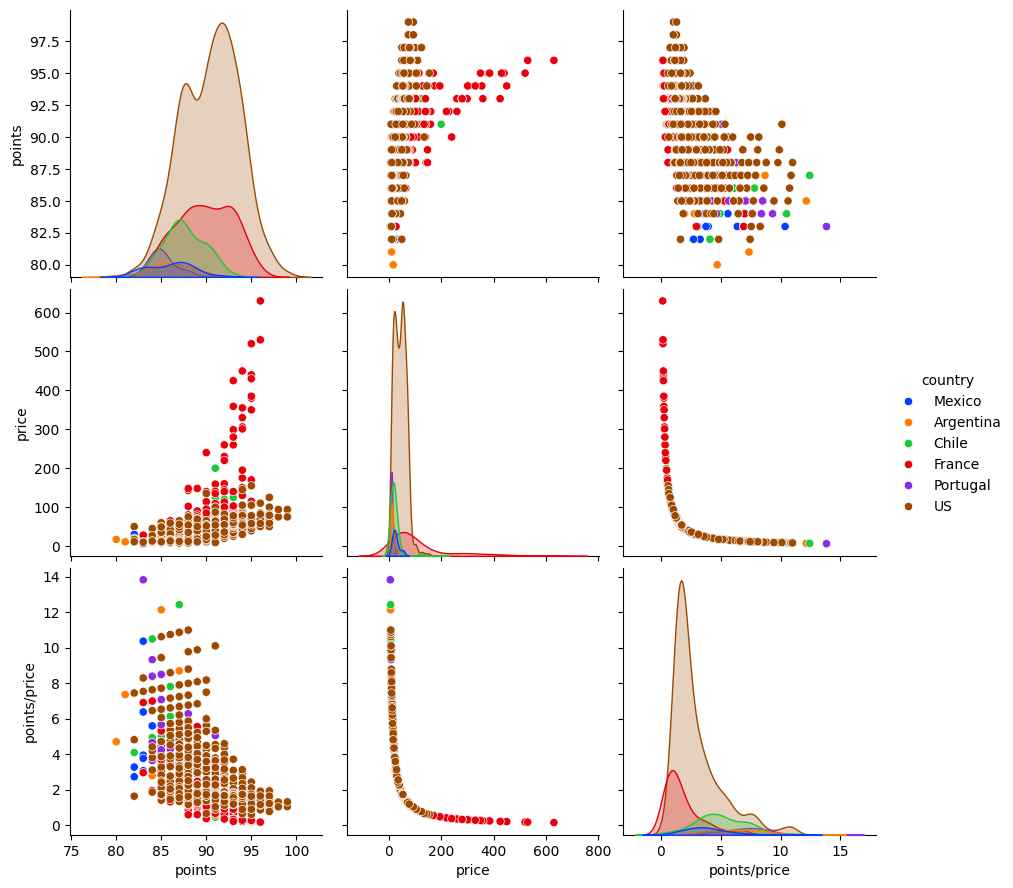

In [ ]:
mexico_data = df3[df3['country'] == 'Mexico']

# Eliminar los datos de México del DataFrame original
holder = df3[df3['country'] != 'Mexico']

# Concatenar la tabla original con los datos de México
mx_top = pd.concat([mexico_data, holder])
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-72-a75306f8387d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'US'),
  Text(5, 0, 'Mexico')])

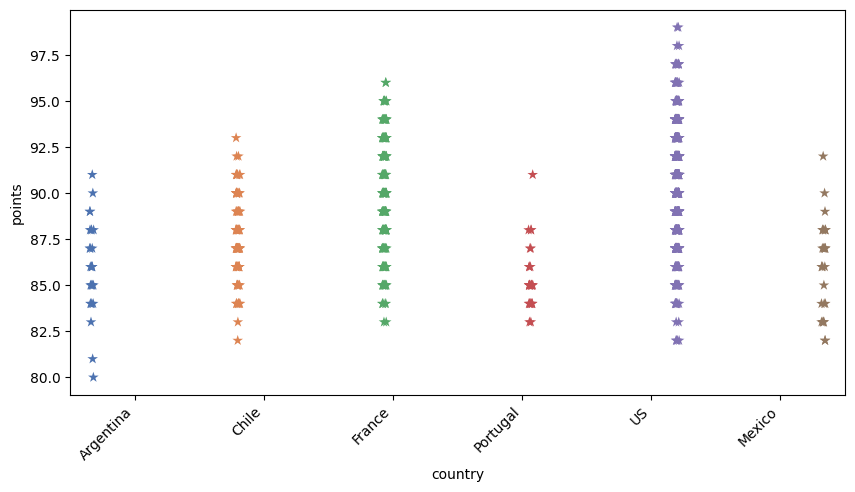

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-73-d31340acea07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Trapiche (Argentina)'),
  Text(1, 0, 'Concha y Toro (Chile)'),
  Text(2, 0, 'Undurraga (Chile)'),
  Text(3, 0, 'Albert Bichot (France)'),
  Text(4, 0, 'Georges Duboeuf (France)'),
  Text(5, 0, 'Jean-Luc and Paul Aegerter (France)'),
  Text(6, 0, 'Louis Latour (France)'),
  Text(7, 0, 'DFJ Vinhos (Portugal)'),
  Text(8, 0, 'Casa Santos Lima (Portugal)'),
  Text(9, 0, 'Wines & Winemakers (Portugal)'),
  Text(10, 0, 'Chateau Ste. Michelle (US)'),
  Text(11, 0, 'Columbia Crest (US)'),
  Text(12, 0, 'Gary Farrell (US)'),
  Text(13, 0, 'Kendall-Jackson (US)'),
  Text(14, 0, 'Robert Mondavi (US)'),
  Text(15, 0, 'Rodney Strong (US)'),
  Text(16, 0, 'Lynmar (US)'),
  Text(17, 0, 'Testarossa (US)'),
  Text(18, 0, 'Williams Selyem (US)'),
  Text(19, 0, 'Siduri (US)'),
  Text(20,

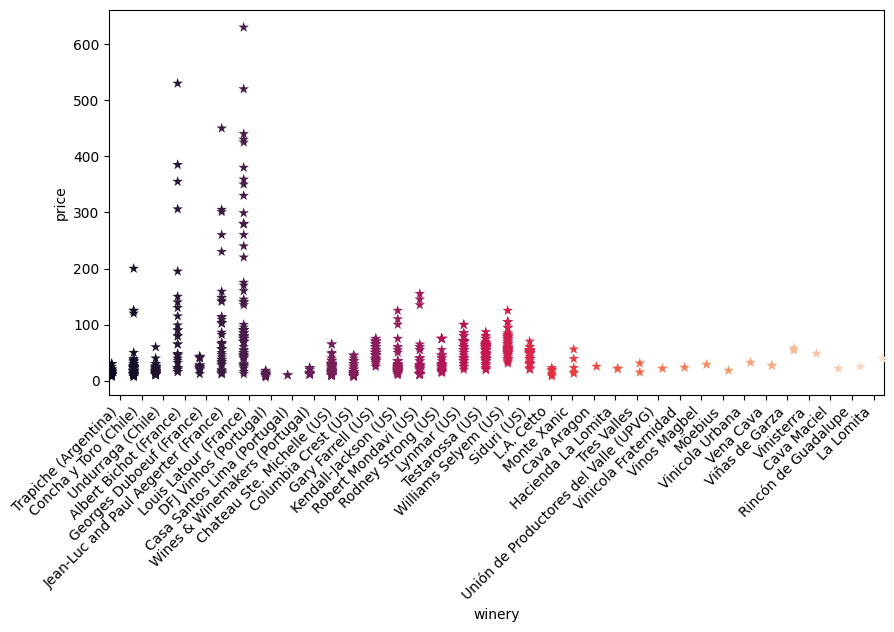

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [ ]:
df3

,country,variety,winery,points,price,points/price
0,Argentina,Cabernet Sauvignon,Trapiche (Argentina),84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Trapiche (Argentina),90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Trapiche (Argentina),88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Trapiche (Argentina),91,30.0,3.033333
...,...,...,...,...,...,...
1024,Mexico,Red Blend,Viñas de Garza,92,54.0,1.703704
1025,Mexico,Chardonnay,L.A. Cetto,84,10.0,8.400000
1026,Mexico,Sauvignon Blanc-Chenin Blanc,Hacienda La Lomita,86,22.0,3.909091
1027,Mexico,Bordeaux-style Red Blend,La Lomita,88,40.0,2.200000


<ipython-input-75-1a6104e1c477>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias = df3.groupby(['country', 'winery']).mean()


points          85.964286
price           15.107143
points/price     6.434750
Name: (Argentina, Trapiche (Argentina)), dtype: float64
points          87.559322
price           28.224138
points/price     4.965520
Name: (Chile, Concha y Toro (Chile)), dtype: float64
points          87.487805
price           19.325000
points/price     5.204695
Name: (Chile, Undurraga (Chile)), dtype: float64
points           90.634615
price           115.714286
points/price      1.899756
Name: (France, Albert Bichot (France)), dtype: float64
points          86.588235
price           28.866667
points/price     3.385548
Name: (France, Georges Duboeuf (France)), dtype: float64
points          88.862745
price           96.000000
points/price     2.109500
Name: (France, Jean-Luc and Paul Aegerter (France)), dtype: float64
points           90.604651
price           133.779221
points/price      1.346292
Name: (France, Louis Latour (France)), dtype: float64
points          88.000000
price           27.000000
poin

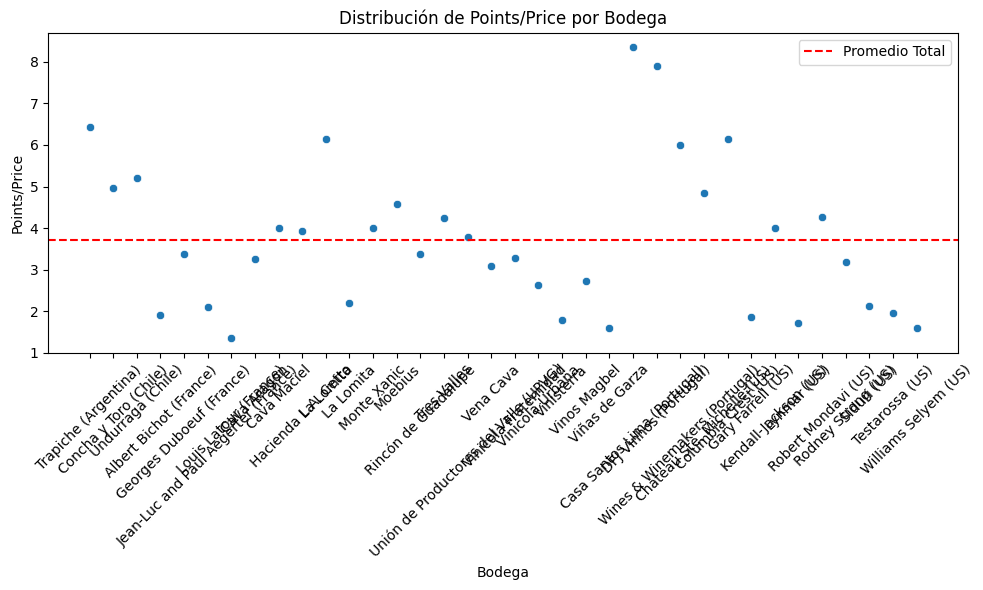

In [ ]:


# Supongamos que ya tienes el DataFrame 'medias' calculado usando groupby
# Ejemplo de DataFrame 'medias'
medias = df3.groupby(['country', 'winery']).mean()

# Calcular el promedio de todos los datos
promedio_total = medias['points/price'].mean()

# Dibujar el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='winery', y='points/price', data=medias)

# Dibujar una línea que marque el promedio de todos los datos
plt.axhline(y=promedio_total, color='r', linestyle='--', label='Promedio Total')

# Marcar los valores promedio por cada bodega
for index, row in medias.iterrows():
    print(row)

plt.xticks(rotation=45)
plt.xlabel('Bodega')
plt.ylabel('Points/Price')
plt.title('Distribución de Points/Price por Bodega')
plt.legend()
plt.tight_layout()
plt.show()

# TU CODIGO


In [ ]:
medias

points       price  \
country   winery                                                         
Argentina Trapiche (Argentina)                   85.964286   15.107143   
Chile     Concha y Toro (Chile)                  87.559322   28.224138   
          Undurraga (Chile)                      87.487805   19.325000   
France    Albert Bichot (France)                 90.634615  115.714286   
          Georges Duboeuf (France)               86.588235   28.866667   
          Jean-Luc and Paul Aegerter (France)    88.862745   96.000000   
          Louis Latour (France)                  90.604651  133.779221   
Mexico    Cava Aragon                            88.000000   27.000000   
          Cava Maciel                            88.000000   22.000000   
          Hacienda La Lomita                     84.500000   21.500000   
          L.A. Cetto                             85.428571   15.714286   
          La Lomita                              88.000000   40.000000   
          Monte Xanic                            87.000000   29.200000   
          Möebius                                87.000000   19.000000   
          Rincón de Guadalupe                    88.000000   26.000000   
          Tres Valles                            86.500000   23.000000   
          Unión de Productores del Valle (UPVG)  83.000000   22.000000   
          Vena Cava                              83.500000   27.000000   
          Vinicola Fraternidad                   82.000000   25.000000   
          Vinicola Urbana                        87.000000   33.000000   
          Vinisterra                             87.000000   49.000000   
          Vinos Magbel                           82.000000   30.000000   
          Viñas de Garza                         89.500000   56.000000   
Portugal  Casa Santos Lima (Portugal)            83.666667   10.000000   
          DFJ Vinhos (Portugal)                  85.866667   11.666667   
          Wines & Winemakers (Portugal)          85.076923   15.230769   
US        Chateau Ste. Michelle (US)             88.792208   22.766234   
          Columbia Crest (US)                    88.113636   19.279070   
          Gary Farrell (US)                      91.681159   52.507246   
          Kendall-Jackson (US)                   88.950000   29.183333   
          Lynmar (US)                            92.805556   60.708333   
          Robert Mondavi (US)                    87.622222   33.911111   
          Rodney Strong (US)                     89.131579   35.789474   
          Siduri (US)                            90.327273   45.690909   
          Testarossa (US)                        91.041667   51.427083   
          Williams Selyem (US)                   93.077922   62.610390   

                                                 points/price  
country   winery                                               
Argentina Trapiche (Argentina)                       6.434750  
Chile     Concha y Toro (Chile)                      4.965520  
          Undurraga (Chile)                          5.204695  
France    Albert Bichot (France)                     1.899756  
          Georges Duboeuf (France)                   3.385548  
          Jean-Luc and Paul Aegerter (France)        2.109500  
          Louis Latour (France)                      1.346292  
Mexico    Cava Aragon                                3.259259  
          Cava Maciel                                4.000000  
          Hacienda La Lomita                         3.930736  
          L.A. Cetto                                 6.139641  
          La Lomita                                  2.200000  
          Monte Xanic                                3.993357  
          Möebius                                    4.578947  
          Rincón de Guadalupe                        3.384615  
          Tres Valles                                4.235484  
          Unión de Productores del Valle (UPVG)      3.772727  
          Vena Cava    

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

<ipython-input-77-29735bcfbe3d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias = df3.groupby(['country']).mean().sort_values('points/price', ascending=False)


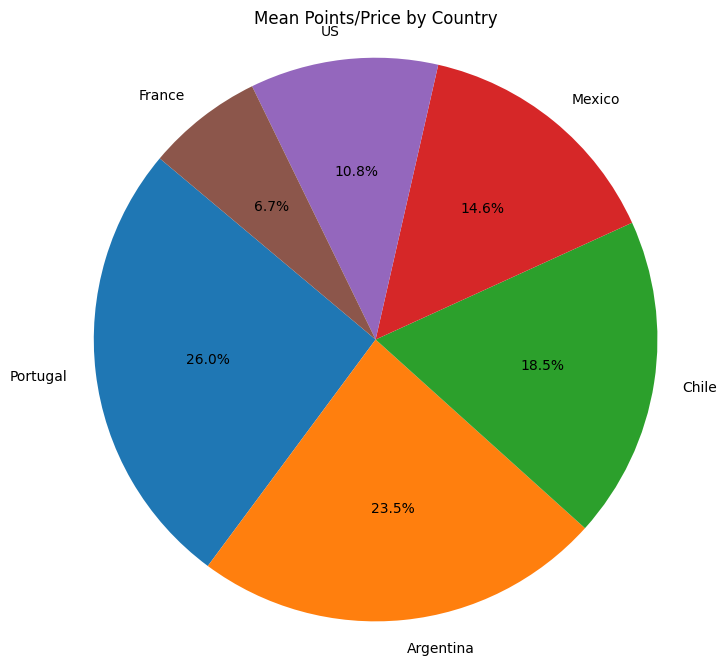

In [ ]:
# TU CODIGO
medias = df3.groupby(['country']).mean().sort_values('points/price', ascending=False)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(medias['points/price'], labels=medias.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Points/Price by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
medias

,points,price,points/price
country,,,
Portugal,85.322581,13.100000,7.115221
Argentina,85.964286,15.107143,6.434750
Chile,87.530000,24.591837,5.063142
Mexico,86.033333,26.800000,4.009545
US,90.464455,43.487342,2.957489
France,89.849515,111.242236,1.826897
